In [5]:
# 读取数据
import pandas as pd #数据分析

col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data= pd.read_csv("E:\Pycharm\Intrusion_Detection\kddcup.data_10_percent.csv",  header=None,names = col_names)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
y_1=data['label'].copy()   #一维
##y的处理
u2r=["buffer_overflow.","loadmodule.","perl.","rootkit."]
r2l=["ftp_write.","imap.","guess_passwd.","phf.","spy.","multihop.","warezmaster.","warezclient."]
dos=["back.","land.","pod.","smurf.","teardrop.",'neptune.']
probe=["satan.","portsweep.","ipsweep.","nmap."]
for i in u2r:
    y_1[y_1==i]="u2r"
for i in r2l:
    y_1[y_1==i]="r2l"
for i in dos:
    y_1[y_1==i]="dos"
for i in probe:
    y_1[y_1==i]="probe"
y_1[y_1=="normal."]="normal"
print(y_1.value_counts())

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: label, dtype: int64


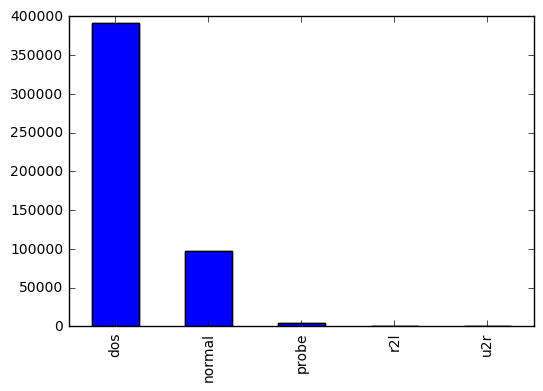

In [11]:
import matplotlib.pyplot as plt
y_1.value_counts().plot(kind='bar')
plt.show()

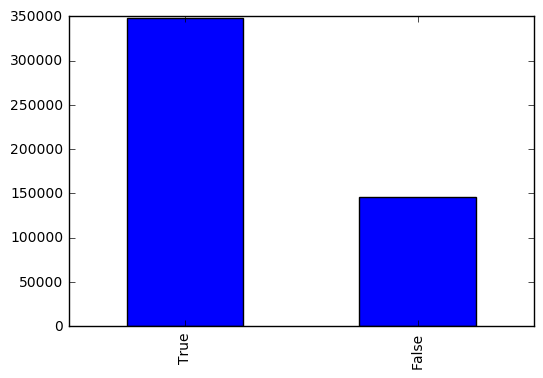

True     348435
False    145586
dtype: int64
冗余百分比： 0.705304025537


In [54]:
#去重
import matplotlib.pyplot as plt
IsDuplicated=data.duplicated()
IsDuplicated.value_counts().plot(kind='bar',color=['red','blue'])
plt.show()
print(IsDuplicated.value_counts())
print("冗余百分比：",IsDuplicated.value_counts()[1]/len(IsDuplicated))
data_1=data.drop_duplicates()

In [55]:
y_1=data_1['label'].copy()   #一维
##y的处理
u2r=["buffer_overflow.","loadmodule.","perl.","rootkit."]
r2l=["ftp_write.","imap.","guess_passwd.","phf.","spy.","multihop.","warezmaster.","warezclient."]
dos=["back.","land.","pod.","smurf.","teardrop.",'neptune.']
probe=["satan.","portsweep.","ipsweep.","nmap."]
for i in u2r:
    y_1[y_1==i]="u2r"
for i in r2l:
    y_1[y_1==i]="r2l"
for i in dos:
    y_1[y_1==i]="dos"
for i in probe:
    y_1[y_1==i]="probe"
y_1[y_1=="normal."]="normal"
print(y_1.value_counts())

normal    87832
dos       54572
probe      2131
r2l         999
u2r          52
Name: label, dtype: int64


In [56]:
data.protocol_type.value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [57]:
data.flag.value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [58]:
data.service.value_counts()

ecr_i          281400
private        110893
http            64293
smtp             9723
other            7237
domain_u         5863
ftp_data         4721
eco_i            1642
ftp               798
finger            670
urp_i             538
telnet            513
ntp_u             380
auth              328
pop_3             202
time              157
csnet_ns          126
remote_job        120
imap4             117
gopher            117
domain            116
discard           116
iso_tsap          115
systat            115
shell             112
echo              112
rje               111
sql_net           110
whois             110
printer           109
                ...  
klogin            106
vmnet             106
bgp               106
uucp_path         106
ssh               105
nnsp              105
supdup            105
login             104
hostnames         104
efs               103
daytime           103
link              102
netbios_ns        102
pop_2             101
ldap      

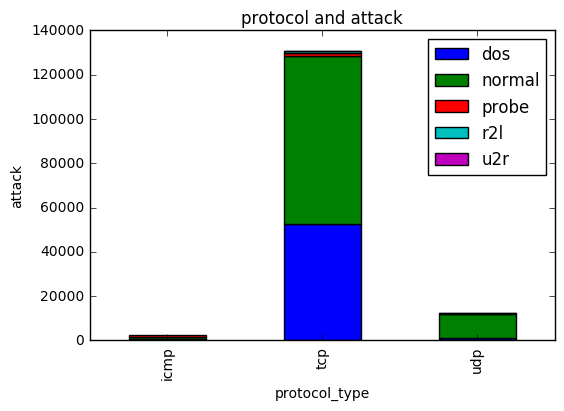

In [59]:
#查看协议类型与攻击类型的关系
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

nor = data_1.protocol_type[y_1 == "normal"].value_counts()
dos = data_1.protocol_type[y_1 == "dos"].value_counts()
pro = data_1.protocol_type[y_1 == "probe"].value_counts()
u2r = data_1.protocol_type[y_1 == "u2r"].value_counts()
r2l = data_1.protocol_type[y_1 == "r2l"].value_counts()
df=pd.DataFrame({'normal':nor, 'dos':dos,'probe':pro,'u2r':u2r,'r2l':r2l})
df.plot(kind='bar', stacked=True)
plt.title("protocol and attack")
plt.xlabel("protocol_type") 
plt.ylabel("attack") 

plt.show()

In [66]:
# #labelencoder
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# protocol_1=le.fit_transform(data_1.protocol_type)
# protocol=pd.DataFrame(protocol_1,columns=['protocol'])
# data_2=pd.concat([data_1,protocol],axis=1)
# data_2.shape

(204925, 43)

In [75]:
#one-hot
dummies_protocol = pd.get_dummies(data_1["protocol_type"], prefix='protocol')
dummies_flag = pd.get_dummies(data_1["flag"], prefix='flag')
dummies_service = pd.get_dummies(data_1["service"], prefix='service')

In [78]:
dummies_flag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Data columns (total 11 columns):
flag_OTH       145586 non-null float64
flag_REJ       145586 non-null float64
flag_RSTO      145586 non-null float64
flag_RSTOS0    145586 non-null float64
flag_RSTR      145586 non-null float64
flag_S0        145586 non-null float64
flag_S1        145586 non-null float64
flag_S2        145586 non-null float64
flag_S3        145586 non-null float64
flag_SF        145586 non-null float64
flag_SH        145586 non-null float64
dtypes: float64(11)
memory usage: 13.3 MB
